#Invariant Sets and Stable/Unstable Manifolds
##Math 3910 - 01: Dynamical Systems

###Seattle University, Katie Oliveras

Given the map defined by 
\begin{eqnarray*}
x_{k+1} &=& \frac{1}{2}x_k,\\ 
y_{k+1} &=& 2 y_k - 7x_k^2,
\end{eqnarray*}
let's determing the following:

1. What are the fixed points of the system?
2. What is the stabilty of the fixed points?
3. Can we determine the stable manifold of the system?
4. Can we numerically show that the stable manifold is an invariant set?

In [1]:
%pylab inline 
from sympy import *
init_printing() # This allows us to print the output in a pretty Math font!

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sympy.abc import x,y 

In [3]:
f = 0.5*x;

g = 2*y - 7*x**2;

##Finding the fixed points
Given the map defined by 
\begin{eqnarray*}
x_{k+1} &=& \frac{1}{2}x_k,\\ 
y_{k+1} &=& 2 y_k - 7x_k^2,
\end{eqnarray*}
we can determine all fixed points by solving $$x^* = f(x^*,y^*), \qquad y^*= g(x^*,y^*).$$

Recall that python solves systems of the form $$f(x^*,y^*)-x^*=0, \qquad g(x^*,y^*)-y^*=0.$$ The command 

    fixedPoints = solve([f-x,g-y],[x,y])

returns a list of ordered pairs corresponding to the fixed points of the system defined above.

In [4]:
fixedPoints = solve([f - x, g-y],[x,y])
fixedPoints

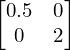

In [5]:
J = Matrix([[diff(f,x), diff(f,y)],[diff(g,x), diff(g,y)]]).subs(x,fixedPoints[0][0])
J

Something about calculating eigenvalues and eigenvectors

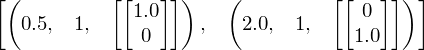

In [6]:
J.eigenvects()

Now, let's determine the stable manifold corresponding to stable eigenvalue of $1/2$.  

##Calculating the Stable Manifold

In order to determine the stable manifold, we are looking for a function $y = h(x)$ such that
- The fixed point is on the stable manifold.  That is, $y^* = h(x^*)$.
- The tangent vector to the stable manifold at the fixed point is the same as the stable eigenvector.  In this case, $$V^s = \begin{bmatrix}1\\0\end{bmatrix}$$ and so, $h'(x^*) = 0$.  
- The stable manifold is the collection of all points such that $$\left\vert \vec{f}^n(\vec{x}) - \vec{x}^*\right\vert \to 0$$ as $n\to\infty$.

In order to determine $h(x)$, we will need to use the equations for the map given by

\begin{eqnarray*}
x_{k+1} &=& \frac{1}{2}x_k,\\ 
y_{k+1} &=& 2 y_k - 7x_k^2,
\end{eqnarray*}

where we will now plug in the fact that we want $y_k = h(x_k)$.  This implies that 

\begin{eqnarray*}
x_{k+1} &=& \frac{1}{2}x_k,\\ 
h(x_{k+1}) &=& 2 h(x_k) - 7x_k^2.
\end{eqnarray*}

Using the fact that $x_{k+1} = \frac{1}{2}x_k$, we can replace $h(x_{k+1})$ with $h(\frac{1}{2}x_k)$ by using the top equation in the system.  Thus, we now have the relationship 

$$h\left(\frac{1}{2}x_k\right) = 2h(x_k) - 7x_k^2.$$

Let's now assume that $h(x)$ has a Taylor Series expansion where 

$$h(x) = a_0 + a_1 x + a_2 x^2 + \ldots$$

Our goal will be to determine the coefficients $a_j$ for $j = 1, 2, \ldots$

In the next steps, I will show you how you can use SymPy to determine these coefficients.

###Setting up the series expansion for $h(x)$

In [10]:
def h(x):
    a = Matrix(symbols('a:4'))
    xpowers = Matrix([x**n for n in range(len(a))])
    return a.dot(xpowers)

h(x)

###Plugging in the series expansion to determine $h(x)$
Now that we have defined the function $h(x)$, we can now evaluate separately the left and right hand sides of

$$h\left(\frac{1}{2} x\right) = 2h(x) - 7x^2.$$

In [11]:
lhs = h(x/2)
rhs = 2*h(x) - 7*x**2

Now, we need to just determine the coefficients of the various powers of $x$ from each side of the polynomial.  We can do this easily by 
1. Telling python that `lhs` and `rhs` are both polynomials in $x$ by using `Poly`
2. using the `.all_coeffs()` command.

It is important to be aware of how the `all_coeffs()` command works in python.  For example, if $p(x)$ is a polynomial of the form 

$$p(x) = 2x^4 + 3x^2 + x, $$ 

then calling `all_coeffs()` on $p(x)$ would return 

$$\begin{bmatrix} 2, & 0, & 3,& 1, & 0\end{bmatrix}.$$  

The important thing to note is that the coefficients are listed according to their powers in $x$ in *descending order*.

In [18]:
Poly(lhs,x).all_coeffs()

In [19]:
Poly(rhs,x).all_coeffs()

###Solving for the coefficients

So now, we get a series of equations that we can use to solve for the $a_j$'s.  
\begin{eqnarray*}
x^0&:& \qquad &&a_0 = a_0 &&\\
x^1&:& &&\frac{1}{2}a_1 = a_1, \qquad &&a_1 = 0\\
x^2&:& &&\frac{1}{4}a_2 = 2a_2 - 7,  && a_2 = 4\\
x^n&:& &&\frac{1}{2^n}a_n = 2a_n, \qquad &&a_n = 0\\
\end{eqnarray*}

Since we know that $(0,0)$ must be on the stable manifold, we knwo $h(0) = 0$ which gives that $a_0 = 0$.  Thus, we find 

$$h(x) = 4x^2.$$


##Testing the invariance of the stable manifold

In [20]:
from pylab import *
from numpy import *

%matplotlib inline

In [21]:
def f(x,y):
    return 0.5*x;
def g(x,y):
    return 2*y - 7*x**2;

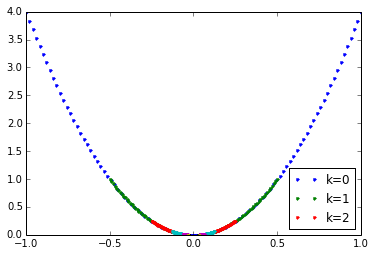

In [22]:
x = linspace(-1,1,100);
y = 4*x**2;

plot(x,y,'.')
for k in range(1,8):
    xn = f(x,y);
    yn = g(x,y);
    plot(xn,yn,'.')
    x = xn; y = yn;
legend(('k=0','k=1','k=2'),loc='lower right')
